In [71]:
# import statements
import pandas as pd
import numpy as np
import glob

## Apple Data Cleaning

Raw Data

In [72]:
# raw data files from github
WA_apples_1889_2010 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/USDA_NASS_WA-apples_1889-2010.csv')
WA_apple_production_2007_2022 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_apple_production_2007_2022.csv')
WA_apple_yields_2007_2021 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_apple_yields_lb_acre_2007-2021.csv')
WA_apple_yields_utilization_2007_2022 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_prod_utilization_2007_2022.csv')
WA_apple_bearing_2007_2021 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_apples_bearing_2007_2021.csv')
WA_apple_price_1909_2021 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_apples_price_1909_2021.csv')
WA_apple_utilized_production_2007_2021 = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/WA_apples_utilized_production_2007_2021.csv')

Rename Columns

In [73]:
# all data 1889 - 2010
WA_apples_1889_2010 = WA_apples_1889_2010.rename(
    columns={"Year": "year",
              "Bearing per Acreage": "bearing_acre",
              "Yield per Acre Pounds": "yield_acre_lbs",
              "Total Production Pounds": "total_production_lbs",
              "Utilitzed Production Pounds": "utilized_production_lbs",
              "Average Price per Pound Cents": "avg_price_pound_cents",
              "Average Price per Pound Dollars": "avg_price_pound_dollars",
              "Value of Utilized Production Dollars": "value_utilized_production_dollars"})

#WA_apples_1889_2010.sort_values(by = 'year', ascending= False, ignore_index = True).head(25)

In [74]:
# 2007 - 2022 broken down by  apple type
WA_apple_production_2007_2022 = WA_apple_production_2007_2022.rename(
    columns={"Program": "program",
              "Year": "year",
              "Period": "period",
              "Week Ending": "week_ending",
              "Geo Level": "geo_level",
              "State": "state",
              "State ANSI": "state_ansi",
              "Ag	District": "ag_district",
              "Ag	District": "ag_district_code",
              "County": "county",
              "County	ANSI": "county_ansi",
              "Zip Code": "zip_code",
              "Region": "region",
              "watershed_code": "watershed_code",
              "Watershed": "watershed",
              "Commodity": "commodity",
              "Data	Item": "data_item",
              "Domain": "domain",
              "Domain	Category": "domain_category",
              "Value": "value",
              "CV (%)": "cv_percent"})

#WA_apple_production_2007_2022.head(5)

In [75]:
# yields 2007 - 2021
WA_apple_yields_2007_2021 = WA_apple_yields_2007_2021.rename(
    columns={"Program": "program",
              "Year": "year",
              "Period": "period",
              "Geo Level": "geo_level",
              "State": "state",
              "Commodity": "commodity",
              "Data	Item": "data_item",
              "Domain": "domain",
              "Yield Pounds per Acre": "yield_acre_lbs"})

#WA_apple_yields_2007_2021.head(5)

In [76]:
# production and utilization 2007 - 2022
WA_apple_production_utilization_2007_2022 = WA_apple_yields_utilization_2007_2022.rename(
    columns={"Program": "program",
              "Year": "year",
              "Geo Level": "geo_level",
              "State": "state",
              "Commodity": "commodity",
              "Domain": "domain",
              "APPLES - PRODUCTION, MEASURED IN LB": "total_production_lbs",
              "APPLES, UTILIZED - PRODUCTION, MEASURED IN $": "value_utilized_production_dollars"})

#WA_apple_production_utilization_2007_2022.head()

In [77]:
# bearing 2007 - 2021
WA_apple_bearing_2007_2021 = WA_apple_bearing_2007_2021.rename(
    columns={"Program": "program",
              "Year": "year",
              "Geo Level": "geo_level",
              "State": "state",
              "Commodity": "commodity",
              "Domain": "domain",
              "APPLES - ACRES BEARING": "bearing_acre"}
)

#WA_apple_bearing_2007_2021.head()

In [78]:
# price per pound 1909 - 2021
WA_apple_price_1909_2021 = WA_apple_price_1909_2021.rename(
    columns={"Program": "program",
              "Year": "year",
              "Geo Level": "geo_level",
              "State": "state",
              "Commodity": "commodity",
              "Domain": "domain",
              "APPLES - PRICE RECEIVED, MEASURED IN $ / LB Value": "avg_price_pound_dollars"}
)

#WA_apple_price_1909_2021.head()

In [79]:
# utilized production 2007 - 2021
WA_apple_utilized_production_2007_2021 = WA_apple_utilized_production_2007_2021.rename(
    columns={"Program": "program",
              "Year": "year",
              "Geo Level": "geo_level",
              "State": "state",
              "Commodity": "commodity",
              "Domain": "domain",
              "APPLES, UTILIZED - PRODUCTION, MEASURED IN LB": "utilized_production_lbs"}    
)

#WA_apple_utilized_production_2007_2021.head()

Create Cleaned Data

In [80]:
match_cols = ['program', 'year', 'geo_level', 'state', 'commodity', 'domain']

# 2007 - 2022
apples_2007_2022 = pd.merge(WA_apple_production_utilization_2007_2022[['program', 'year', 'geo_level', 'state', 'commodity', 'domain','total_production_lbs', 'value_utilized_production_dollars']],
                            WA_apple_yields_2007_2021[['program', 'year', 'geo_level', 'state', 'commodity', 'domain','yield_acre_lbs']], 
                            on= match_cols, 
                            how='outer')

# add bearing
apples_2007_2022 = pd.merge(apples_2007_2022, WA_apple_bearing_2007_2021,
                            on = match_cols,
                            how = "outer")

# add price
apples_2007_2022 = pd.merge(apples_2007_2022, WA_apple_price_1909_2021[WA_apple_price_1909_2021['year'] > 2006],
                            on = match_cols,
                            how = "outer")

# add utilized production
apples_2007_2022 = pd.merge(apples_2007_2022, WA_apple_utilized_production_2007_2021,
                            on = match_cols,
                            how = "outer")

In [81]:
# 1889 - 2022 - union of years of data
frames = [apples_2007_2022, WA_apples_1889_2010[WA_apples_1889_2010['year'] < 2007]]
apples_1889_2022 = pd.concat(frames)

In [82]:
# clean up merged table

# order data by year
apples_1889_2022 = apples_1889_2022.sort_values(by = 'year', ascending= False, ignore_index = True)

# drop unnecessary columns
apples_1889_2022 = apples_1889_2022.drop(columns=['program', 'commodity', 'domain','avg_price_pound_cents', 'Period'])

# remove 2022 since not over yet
apples_1889_2022 = apples_1889_2022[apples_1889_2022['year'] != 2022]

# fill in geo_level and state
apples_1889_2022['geo_level'] = 'STATE'
apples_1889_2022['state'] = 'WASHINGTON'

# re-order columns
WA_apples_1889_2021 = apples_1889_2022[['year', 'geo_level', 'state', 'yield_acre_lbs', 'bearing_acre', 'total_production_lbs', 
                                        'utilized_production_lbs', 'avg_price_pound_dollars', 'value_utilized_production_dollars']]

In [83]:
# remove commas
WA_apples_1889_2021 = WA_apples_1889_2021.replace(',','', regex=True)

# remove columns
WA_apples_1889_2021.drop(columns=['geo_level', 'state'], inplace=True)

In [84]:
WA_apples_1889_2021.head()

,year,yield_acre_lbs,bearing_acre,total_production_lbs,utilized_production_lbs,avg_price_pound_dollars,value_utilized_production_dollars
1,2021,39300,172000,6760000000,6489600000,0.337,2185373000
2,2020,39500,175000,6915000000,6569300000,0.319,2095265000
3,2019,44200,172000,7600000000,7220000000,0.271,1958900000
4,2018,39400,170000,6700000000,6365000000,0.336,2140650000
5,2017,45500,165000,7500000000,7200000000,0.338,2430353000


Download csv (for github)

In [85]:
from google.colab import drive
#drive.mount('drive')
WA_apples_1889_2021.to_csv('WA_apples_1889_2021.csv') 
!cp WA_apples_1889_2021.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


Add historic farm information

In [86]:
apple_farms = pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Raw%20Data/Apple%20Data/apple_production_farms.csv')

#remove extra columns
apple_farms = apple_farms.drop(['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis = 1)

apple_farms.head(11)

,year,total_num_farms,1_to_9,10_to_49,50_to_69,70_to_99,100_to_139,140_to_179,180_to_219,220_to_259,260_to_499,500_to_999,1000_to_1999,2000_plus,trees_per_acre
0,2017,"2,522",732,821,125,146,145,100,87,59,124,100,49,34,706.0
1,2012,"2,839",675,997,184,226,158,121,74,59,147,98,55,45,562.0
2,2007,"3,052",558,"1,207",233,241,157,130,86,81,139,110,66,44,434.0
3,2002,"3,870",636,"1,570",337,335,212,144,107,79,187,148,65,50,391.0
4,1997,"4,207",701,"1,678",350,343,280,193,98,96,203,137,80,48,NaN
5,1992,"4,596",845,"1,953",381,368,262,179,107,77,200,121,65,38,NaN
6,1987,"5,171",967,"2,311",411,387,323,178,106,58,214,119,56,41,295.0
7,1982,"5,402","1,061","2,500",432,376,271,187,96,67,206,113,51,42,269.0
8,1978,"5,601",966,"2,826",439,362,213,190,107,67,266,92,41,32,217.0
9,1974,"4,319",700,"2,287",366,315,223,121,73,61,93,52,22,6,NaN


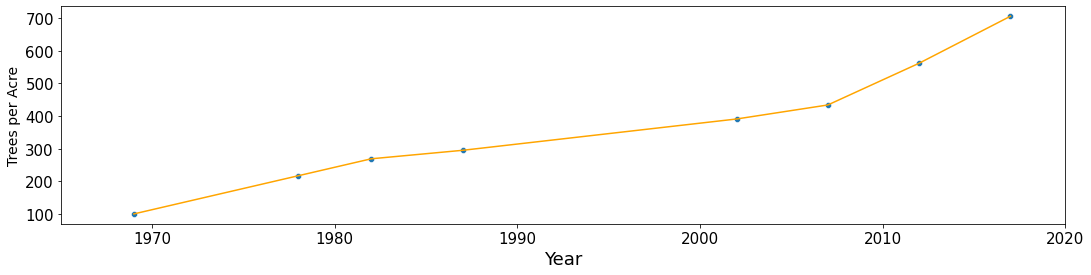

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,4))
sns.scatterplot(data = apple_farms, x  = 'year', y = 'trees_per_acre')
sns.scatterplot(data = apple_farms.loc[apple_farms['trees_per_acre'] == True], x  = 'year', y = 'trees_per_acre', color = 'orange')
sns.lineplot(data = apple_farms, x  = 'year', y = 'trees_per_acre', color = 'orange')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Trees per Acre', fontsize = 14)

plt.xlim(1965, 2020)

plt.tick_params(labelsize = 15)

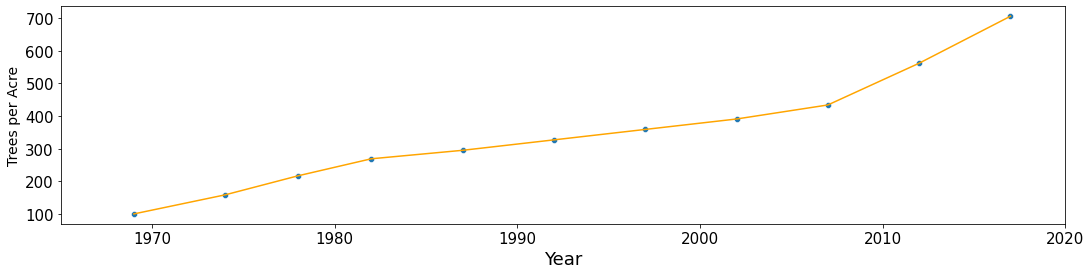

In [88]:
# fill in missing trees per acre values
apple_farms['trees_per_acre'] = apple_farms['trees_per_acre'].interpolate(method = 'linear')

plt.figure(figsize = (18,4))
sns.scatterplot(data = apple_farms, x  = 'year', y = 'trees_per_acre')
sns.scatterplot(data = apple_farms.loc[apple_farms['trees_per_acre'] == True], x  = 'year', y = 'trees_per_acre', color = 'orange')
sns.lineplot(data = apple_farms, x  = 'year', y = 'trees_per_acre', color = 'orange')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Trees per Acre', fontsize = 14)

plt.xlim(1965, 2020)

plt.tick_params(labelsize = 15)


In [89]:
apple_farms.head(11)

,year,total_num_farms,1_to_9,10_to_49,50_to_69,70_to_99,100_to_139,140_to_179,180_to_219,220_to_259,260_to_499,500_to_999,1000_to_1999,2000_plus,trees_per_acre
0,2017,"2,522",732,821,125,146,145,100,87,59,124,100,49,34,706.0
1,2012,"2,839",675,997,184,226,158,121,74,59,147,98,55,45,562.0
2,2007,"3,052",558,"1,207",233,241,157,130,86,81,139,110,66,44,434.0
3,2002,"3,870",636,"1,570",337,335,212,144,107,79,187,148,65,50,391.0
4,1997,"4,207",701,"1,678",350,343,280,193,98,96,203,137,80,48,359.0
5,1992,"4,596",845,"1,953",381,368,262,179,107,77,200,121,65,38,327.0
6,1987,"5,171",967,"2,311",411,387,323,178,106,58,214,119,56,41,295.0
7,1982,"5,402","1,061","2,500",432,376,271,187,96,67,206,113,51,42,269.0
8,1978,"5,601",966,"2,826",439,362,213,190,107,67,266,92,41,32,217.0
9,1974,"4,319",700,"2,287",366,315,223,121,73,61,93,52,22,6,158.5


In [90]:
# make total farms numeric
apple_farms['total_num_farms'] = apple_farms['total_num_farms'].str.replace(',','')
apple_farms['total_num_farms'] = pd.to_numeric(apple_farms['total_num_farms'])

Merge Farms into Apple Data (1970+)

In [91]:
# make bearing acres + utilized and total production numeric
WA_apples_1889_2021['utilized_production_lbs'] = pd.to_numeric(WA_apples_1889_2021['utilized_production_lbs'])
WA_apples_1889_2021['total_production_lbs'] = pd.to_numeric(WA_apples_1889_2021['total_production_lbs'])
WA_apples_1889_2021['bearing_acre'] = pd.to_numeric(WA_apples_1889_2021['bearing_acre'])

# apple data 1970 forward
apples_merge = pd.merge(WA_apples_1889_2021, apple_farms[['year', 'total_num_farms', 'trees_per_acre']], how = 'left', on = 'year')
apples_merge['percent_utilized'] = apples_merge.utilized_production_lbs / apples_merge.total_production_lbs * 100

# get from 1969
apples_merge = apples_merge[apples_merge['year'] >= 1969]

# set 1970 as 100 baseline
apples_merge.loc[apples_merge['year'] == 1970, 'trees_per_acre'] = 100

# fill in apple farm data using linear method
apples_merge['trees_per_acre'] = apples_merge['trees_per_acre'].interpolate(method = 'linear')

#find line of best fit: y = a*x + b
x = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
y = apples_merge.loc[apples_merge['year'].between(2007, 2017), ['year','trees_per_acre']].sort_values(by = 'year', ascending = True)['trees_per_acre']
#plt.scatter(x,y)
a, b = np.polyfit(x, y, 1)
apples_merge['trees_per_acre'] = apples_merge['trees_per_acre'].fillna(a*apples_merge['year'] + b)

#add field
apples_merge['utilized_per_acre'] = apples_merge.utilized_production_lbs / apples_merge.bearing_acre

apples_1970 = apples_merge.loc[apples_merge['year'] >= 1970, ['year','yield_acre_lbs','percent_utilized','utilized_per_acre','avg_price_pound_dollars','trees_per_acre']]

In [92]:
# save to csv
from google.colab import drive
drive.mount("drive", force_remount=True)
apples_1970.to_csv('apples_1970.csv')
!cp apples_1970.csv "drive/My Drive/"

Mounted at drive
